# Par Mais Próximo com Varredura de Linha Otimizada
1.  **Pré-processamento dos Pontos**
2.  **Iteração Principal e Estado**
3.  **Gerenciamento da "Janela Ativa"**
4.  **Busca Otimizada Dentro da Janela**

## Gerando os pontos

## Par Mais Próximo com Varredura de Linha Otimizada

In [1]:
import math
import time # Para medir o tempo de execução
import bisect # Para inserção ordenada eficiente

from src.model.ponto import Ponto

def par_mais_proximo_varredura(pontos: list['Ponto']) -> dict:
    """
    Encontra o par de pontos mais próximo usando uma abordagem de varredura de linha.
    Também mede o tempo de execução.

    Parameters
    ----------
    pontos : List[Ponto]
        Lista de objetos do tipo Ponto.

    Returns
    -------
    dict
        Um dicionário contendo:
        - 'ponto_1': primeiro ponto do par mais próximo
        - 'ponto_2': segundo ponto do par mais próximo
        - 'distancia': distância entre os dois pontos
        - 'tempo_execucao': tempo em segundos para encontrar o par
    """
    n = len(pontos)
    if n < 2:
        return {'ponto_1': None, 'ponto_2': None, 'distancia': float('inf'), 'tempo_execucao': 0}

    inicio_tempo = time.perf_counter()

    # 1. Pré-processamento: Ordenar os pontos pela coordenada X.
    pontos_ordenados_x = sorted(pontos, key=lambda p: p.x)

    menor_distancia_quadrada = float('inf')
    par_otimo = (None, None)

    # 2. Janela Ativa: Lista de pontos candidatos que estão à esquerda do ponto atual (P_i)
    janela_ativa_y_ordenada = []
    ponteiro_esquerda_janela = 0

    # 3. Iterar sobre os pontos ordenados por X
    for i in range(n):
        P_i = pontos_ordenados_x[i]

        # 3a. Remover pontos da janela_ativa_y_ordenada que estão muito distantes de P_i.x.
        while ponteiro_esquerda_janela < i:
            P_j_esquerda = pontos_ordenados_x[ponteiro_esquerda_janela]
            dx = P_i.x - P_j_esquerda.x
            if dx * dx >= menor_distancia_quadrada: 

                try:
                    janela_ativa_y_ordenada.remove(P_j_esquerda)
                except ValueError:
                    pass

                ponteiro_esquerda_janela += 1
            else:
                break

        # 3b. Buscar na janela_ativa_y_ordenada (que agora contém pontos próximos em X e está ordenada por Y).
        delta_real = math.sqrt(menor_distancia_quadrada) if menor_distancia_quadrada != float('inf') else float('inf')

        # Encontra o índice do primeiro ponto na janela cuja coordenada Y é < P_i.y - delta_real
        idx_baixo = bisect.bisect_left(janela_ativa_y_ordenada, P_i.y - delta_real, key=lambda p: p.y)
        
        # Encontra o índice do primeiro ponto na janela cuja coordenada Y é > P_i.y + delta_real
        idx_cima = bisect.bisect_right(janela_ativa_y_ordenada, P_i.y + delta_real, key=lambda p: p.y)

        for k in range(idx_baixo, idx_cima):
            P_k_janela = janela_ativa_y_ordenada[k]
            dist_sq = (P_i.x - P_k_janela.x)**2 + (P_i.y - P_k_janela.y)**2
            
            if dist_sq < menor_distancia_quadrada:
                menor_distancia_quadrada = dist_sq
                par_otimo = tuple(sorted((P_i, P_k_janela), key=lambda p: (p.x, p.y)))

        # 3c. Adicionar P_i à janela_ativa_y_ordenada, mantendo a ordem por Y.
        bisect.insort(janela_ativa_y_ordenada, P_i, key=lambda p: p.y)

    fim_tempo = time.perf_counter()
    tempo_execucao = fim_tempo - inicio_tempo

    return {
        'ponto_1': par_otimo[0],
        'ponto_2': par_otimo[1],
        'distancia': math.sqrt(menor_distancia_quadrada) if menor_distancia_quadrada != float('inf') else float('inf'),
        'tempo_execucao': tempo_execucao
    }

Iniciando benchmark incremental para 'par_mais_proximo_varredura' de N=2 até N=10000
Processando N = 100...
Processando N = 200...
Processando N = 300...
Processando N = 400...
Processando N = 500...
Processando N = 600...
Processando N = 700...
Processando N = 800...
Processando N = 900...
Processando N = 1000...
Processando N = 1100...
Processando N = 1200...
Processando N = 1300...
Processando N = 1400...
Processando N = 1500...
Processando N = 1600...
Processando N = 1700...
Processando N = 1800...
Processando N = 1900...
Processando N = 2000...
Processando N = 2100...
Processando N = 2200...
Processando N = 2300...
Processando N = 2400...
Processando N = 2500...
Processando N = 2600...
Processando N = 2700...
Processando N = 2800...
Processando N = 2900...
Processando N = 3000...
Processando N = 3100...
Processando N = 3200...
Processando N = 3300...
Processando N = 3400...
Processando N = 3500...
Processando N = 3600...
Processando N = 3700...
Processando N = 3800...
Processando 

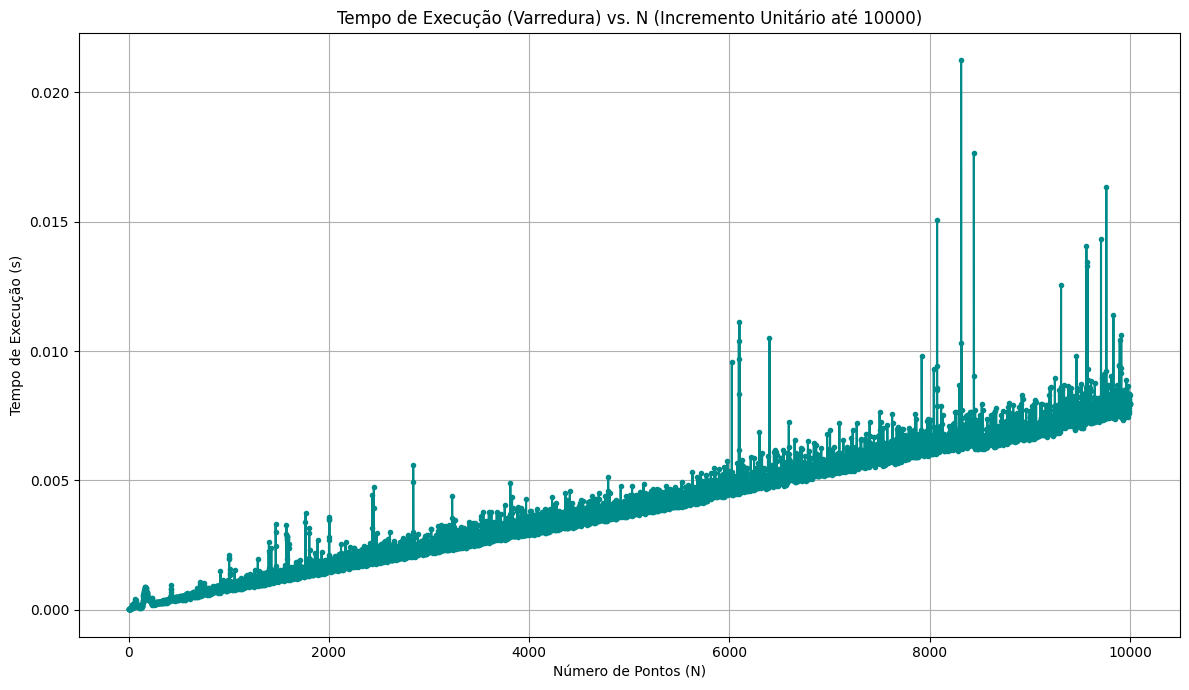

In [4]:
import matplotlib.pyplot as plt
import time
from src.model.ponto import Ponto
from src.utils import gerar_pontos

def benchmark_varredura_fino(n_max: int, limite_coords: int = 10000):
    """
    Testa o algoritmo de varredura incrementando N de 1 em 1 até n_max.
    Armazena os resultados em uma lista de dicionários.
    """
    lista_de_resultados = []
    
    print(f"Iniciando benchmark incremental para 'par_mais_proximo_varredura' de N=2 até N={n_max}")

    for n_atual in range(2, n_max + 1): # Começa em N=2
        # Feedback visual para execuções mais longas
        if n_atual % 100 == 0: # Ajuste conforme necessário
            print(f"Processando N = {n_atual}...")
            
        pontos_gerados = gerar_pontos(n_atual, limite=limite_coords) #
        
        resultado_algoritmo = par_mais_proximo_varredura(pontos_gerados)
        
        # Adiciona o N atual ao dicionário de resultado para referência
        registro_atual = {
            'N': n_atual,
            'ponto_1': str(resultado_algoritmo['ponto_1']), # str() para facilitar a impressão da lista depois
            'ponto_2': str(resultado_algoritmo['ponto_2']),
            'distancia': resultado_algoritmo['distancia'],
            'tempo_execucao': resultado_algoritmo['tempo_execucao']
        }
        lista_de_resultados.append(registro_atual)

    print(f"Benchmark incremental fino concluído para N até {n_max}.")
    
    # Opcional: Plotar N vs. Tempo de Execução
    if lista_de_resultados:
        valores_n = [r['N'] for r in lista_de_resultados]
        tempos = [r['tempo_execucao'] for r in lista_de_resultados]
        
        plt.figure(figsize=(12, 7))
        plt.plot(valores_n, tempos, marker='o', linestyle='-', markersize=3, color='darkcyan')
        plt.title(f'Tempo de Execução (Varredura) vs. N (Incremento Unitário até {n_max})')
        plt.xlabel('Número de Pontos (N)')
        plt.ylabel('Tempo de Execução (s)')
        plt.grid(True)
        plt.tight_layout()
        plt.show()
        
    return lista_de_resultados

# Como você usaria:
n_max_teste = 10000 # Para um teste rápido
resultados_detalhados = benchmark_varredura_fino(n_max=n_max_teste, limite_coords=1000)
# 
# for res in resultados_detalhados:
#     print(f"N={res['N']}, Tempo={res['tempo_execucao']:.6f}s, Dist={res['distancia']:.4f}")

Pior caso teórico com listas: O(N2).
Complexidade do algoritmo conceitual (com estruturas ideais): O(NlogN).